## With Scikit Learn

In [1]:
import numpy as np 
import pandas as pd 
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [2]:
# loading the data set
# dataset = load_iris()
# df= pd.DataFrame(data= dataset.data)
df = pd.read_csv('Iris.csv')

print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Seperating to X and Y 
X = df.iloc[:, 1:5]
y = df.iloc[:, -1:]

# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

In [4]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [6]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
107,7.3,2.9,6.3,1.8
114,5.8,2.8,5.1,2.4
57,4.9,2.4,3.3,1.0
59,5.2,2.7,3.9,1.4
105,7.6,3.0,6.6,2.1


In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

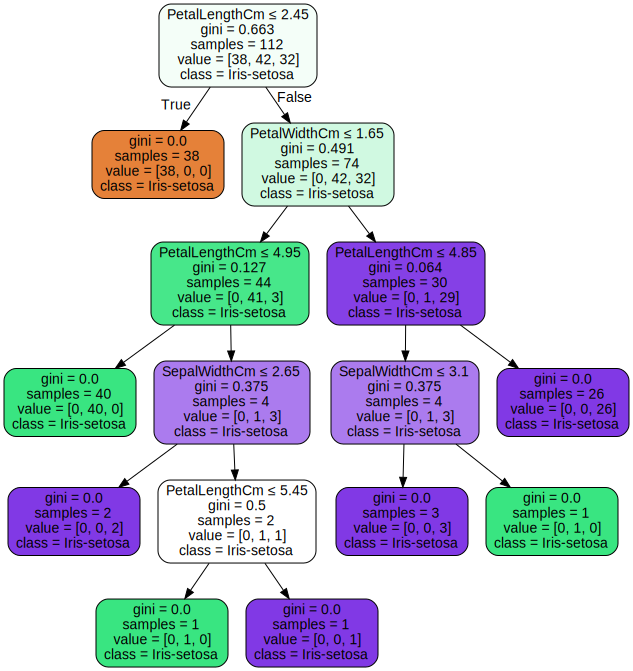

In [8]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.Species,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [9]:
sklearn_y_preds = dt.predict(X_test)
print(f"Sklearn Implementation:\nACCURACY: {accuracy_score(y_test, sklearn_y_preds)}")

Sklearn Implementation:
ACCURACY: 0.9473684210526315


## Implementation from SCRATCH!

In [10]:
# Partition the data into left (indicating True), right (inidcating false).
def partition(data, column, value):
    left = data[data[column] <= value].index
    right = data[data[column] > value].index

    return left, right

In [11]:
# performing a split on the root node
left_idx, right_idx = partition(X_train, "PetalLengthCm", 2.45)

print("[PetalLengthCm <= 2.45]")

# print results --> left_idx = 38 setosa | right index = 42 versicolor, 32 virginica 
print(f"left_idx: {dict(zip(np.unique(y_train.loc[left_idx], return_counts=True)[0], np.unique(y_train.loc[left_idx], return_counts=True)[1]))}\n\
right_idx: {dict(zip(np.unique(y_train.loc[right_idx], return_counts=True)[0], np.unique(y_train.loc[right_idx], return_counts=True)[1]))}")

[PetalLengthCm <= 2.45]
left_idx: {'Iris-setosa': 38}
right_idx: {'Iris-versicolor': 42, 'Iris-virginica': 32}


### Gini Impurity
A measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.<br>
- **Inputs**
    - label: The class label available at current node
- **Outputs**
    - impurity: The gini impurity of the node 

In [12]:
def gini_impurity(label, label_idx):
    # the unique labels and counts in the data
    unique_label, unique_label_count = np.unique(label.loc[label_idx], return_counts=True)

    impurity = 1.0
    for i in range(len(unique_label)):
        p_i = unique_label_count[i] / sum(unique_label_count)
        impurity -= p_i ** 2 
    return impurity

In [13]:
# Gini impurity of the first node
impurity = gini_impurity(y_train, y_train.index)
impurity

0.6626275510204082

### Information Gain
For each node of the tree, the information gain "represents the
    expected amount of information that would be needed to specify whether
    a new instance should be classified yes or no, given that the example
    reached that node. (Source: Wikipedia)
    
- **Inputs**
   - left: The values that met the conditions of the current node
   - right: The values that failed to meet the conditions of the current noode
   - gini_impurity: the uncertainty at the current node
    
- **Outputs**
    - info_gain: The information gain at the node


In [14]:
def information_gain(label, left_idx, right_idx, impurity): 
    p = float(len(left_idx)) / (len(left_idx) + len(right_idx))
    info_gain = impurity - p * gini_impurity(label, left_idx) - (1 - p) * gini_impurity(label, right_idx)
    return info_gain

In [15]:
# testing info gain of the first split at root node
info_gain = information_gain(y_train, left_idx, right_idx, impurity)
info_gain

0.33830322669608387

In [16]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
53,5.5,2.3,4.0,1.3
58,6.6,2.9,4.6,1.3
95,5.7,3.0,4.2,1.2
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4


In [17]:
# testing a random feature and value to see the information gain
left_idx, right_idx = partition(X_train, "PetalWidthCm", 1.65)

impurity = gini_impurity(y_train, y_train.index)

info_gain = information_gain(y_train, left_idx, right_idx, impurity)
info_gain

0.25446843371494937

Now we find features and values automatically and split the best.

In [18]:
def find_best_split(df, label, idx):
    best_gain = 0 
    best_col = None
    best_value = None
    
    df = df.loc[idx] # converting training data to pandas dataframe
    label_idx = label.loc[idx].index # getting the index of the labels

    impurity = gini_impurity(label, label_idx) # determining the impurity at the current node
    
    # go through the columns and store the unique values in each column (no point testing on the same value twice)
    for col in df.columns: 
        unique_values = set(df[col])
        # loop thorugh each value and partition the data into true (left_index) and false (right_index)
        for value in unique_values: 

            left_idx, right_idx = partition(df, col, value)
            # ignore if the index is empty (meaning there was no features that met the decision rule)
            if len(left_idx) == 0 or len(right_idx) == 0: 
                continue 
            # determine the info gain at the node
            info_gain = information_gain(label, left_idx, right_idx, impurity)
            # if the info gain is higher then our current best gain then that becomes the best gain
            if info_gain > best_gain:
                best_gain, best_col, best_value = info_gain, col, value
                
    return best_gain, best_col, best_value

In [19]:
find_best_split(X_train, y_train, y_train.index)

(0.33830322669608387, 'PetalLengthCm', 1.9)

In [20]:
# helper function to count unique values
def count(label, idx):
    unique_label, unique_label_counts = np.unique(label.loc[idx], return_counts=True)
    dict_label_count = dict(zip(unique_label, unique_label_counts))
    return dict_label_count

In [21]:
# check counts at first node to check it aligns with scitkit learn
count(y_train, y_train.index)

{'Iris-setosa': 38, 'Iris-versicolor': 42, 'Iris-virginica': 32}

A Leaf node classifies data.
This holds a dictionary of class (e.g., "Apple") -> number of times it appears in the rows from the training data that reach this leaf.

In [22]:
class Leaf:
    def __init__(self, label, idx):
        self.predictions = count(label, idx)

In [23]:
class Decision_Node:
    def __init__(self,
                 column,
                 value,
                 true_branch,
                 false_branch):
        self.column = column
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch

## Build Tree
Recursively Builds the tree until is leaf is pure. 
    
- Input 
    - df: the training data
    - label: the target labels
    - idx: the indexes 
    
- Output
    - best_col: the best column 
    - best_value: the value of the column that minimizes impurity 
    - true_branch: the true branch 
    - false_branch: the false branch

In [24]:
def build_tree(df, label, idx):
    best_gain, best_col, best_value = find_best_split(df, label, idx)
    
    if best_gain == 0: 
        return Leaf(label, label.loc[idx].index)
    
    left_idx, right_idx = partition(df.loc[idx], best_col, best_value)
    
    true_branch = build_tree(df, label, left_idx)
    
    false_branch = build_tree(df, label, right_idx)
    
    return Decision_Node(best_col, best_value, true_branch, false_branch)

In [25]:
def print_tree(node, spacing=""):
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the col and value at this node
    print(spacing + f"[{node.column} <= {node.value}]")
    

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [26]:
my_tree = build_tree(X_train, y_train, X_train.index)

In [27]:
print_tree(my_tree)

[PetalLengthCm <= 1.9]
--> True:
  Predict {'Iris-setosa': 38}
--> False:
  [PetalWidthCm <= 1.6]
  --> True:
    [PetalLengthCm <= 4.9]
    --> True:
      Predict {'Iris-versicolor': 40}
    --> False:
      [SepalLengthCm <= 6.0]
      --> True:
        [SepalWidthCm <= 2.2]
        --> True:
          Predict {'Iris-virginica': 1}
        --> False:
          Predict {'Iris-versicolor': 1}
      --> False:
        Predict {'Iris-virginica': 2}
  --> False:
    [PetalLengthCm <= 4.8]
    --> True:
      [SepalWidthCm <= 3.0]
      --> True:
        Predict {'Iris-virginica': 3}
      --> False:
        Predict {'Iris-versicolor': 1}
    --> False:
      Predict {'Iris-virginica': 26}


In [28]:
def predict(test_data, tree):
    
    # Check if we are at a leaf node
    if isinstance(tree, Leaf): 
        return max(tree.predictions)
    
    # the current feature_name and value 
    feature_name, feature_value = tree.column, tree.value
    
    # pass the observation through the nodes recursively
    if test_data[feature_name] <= feature_value: 
        return predict(test_data, tree.true_branch)
    
    else: 
        return predict(test_data, tree.false_branch)

In [29]:
# taking one instance to test function 
example, example_target = X_test.iloc[6], y_test.iloc[6]
example, example_target

(SepalLengthCm    5.3
 SepalWidthCm     3.7
 PetalLengthCm    1.5
 PetalWidthCm     0.2
 Name: 48, dtype: float64, Species    Iris-setosa
 Name: 48, dtype: object)

In [30]:
# if working correctly should output setosa
predict(example, my_tree)

'Iris-setosa'

In [31]:
# create a new col of predictions
X_test["predictions"] = X_test.apply(predict, axis=1, args=(my_tree,))


c:\users\utshab kumar ghosh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
sklearn_y_preds == X_test["predictions"]

107     True
114     True
57      True
59      True
105     True
11      True
48      True
72      True
29      True
148     True
30      True
19      True
26      True
111     True
144     True
14      True
103     True
31      True
104     True
120     True
112     True
140     True
135     True
51      True
136     True
1       True
108     True
137     True
49      True
109     True
78      True
17      True
77      True
92      True
133    False
113     True
9       True
84      True
Name: predictions, dtype: bool

## Accuracy

In [33]:
# sklearn accuracy vs my implementation accuracy
print(f"Sklearn Implementation:\nACCURACY: {accuracy_score(y_test, sklearn_y_preds)}\n\n\
My Implementation:\nACCURACY: {accuracy_score(y_test, X_test['predictions'])}")

Sklearn Implementation:
ACCURACY: 0.9473684210526315

My Implementation:
ACCURACY: 0.9736842105263158
